# Оглавление
* [1. Описание проекта](#b1)
* [1.1 Подготовка данных](#b2)
* [2. Анализ данных](#b3)
* [3. Простроение модели](#b4)
* [4. Вывод](#b5)

# Повышение эффективности процесса обогащения золота.

# 1. Описание проекта.<a class="anchor" id="b1"></a>

## 1.1 Цель исследования.

Необходимо подготовить прототип модели машинного обучения для компании «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.\
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.\
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Необходимо:**
1) Подготовить данные;
2) Провести исследовательский анализ данных;
3) Построить и обучить модель.

**Данные находятся в трёх файлах:** \
gold_industry_train.csv — обучающая выборка;\
gold_industry_test.csv — тестовая выборка;\
gold_industry_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверим их по инструкции на корректность.

Далее описан технологический процесс очистки руды. Самостоятельно определим, какие детали нужны для построения модели, а какие — нет.

## 1.2 Описание технологического процесса.

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

**Описание каждой стадии:**

**1. Флотация** \
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**2. Очистка** \
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## 1.3 Описание данных.

**Технологический процесс**

* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate — ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

**Параметры этапов**

* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

**Наименование признаков**

Наименование признаков должно быть такое:\
[этап].[тип_параметра].[название_параметра]\
**Пример:** rougher.input.feed_ag

**Возможные значения для блока [этап]:**

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

**Возможные значения для блока** [тип_параметра]:

* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

## 1.4 Расчёт эффективности.

Нам нужно смоделировать процесс восстановления золота из золотосодержащей руды. 
Эффективность обогащения рассчитывается по формуле


$$ Recovery = \frac{C * (F - T)}{F * (C - T)} * 100\%, $$

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

**Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах.** Причём важен не только финальный продукт, но и черновой концентрат.

**Метрика качества**

sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

$$ \text{sMAPE}=\frac{100\%}{N}\sum_{i=1}^{N}\frac{\left|y_{i}-\hat{y_{i}}\right|}{(|y_{i}|+|\hat{y_{i}}|)/2}. $$

Нужно спрогнозировать сразу две величины:
1. эффективность обогащения чернового концентрата rougher.output.recovery;
2. эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

$$ \text{final_sMAPE}= 25\% * \text{sMAPE(rougher)} + 75\% * \text{sMAPE(final)}$$


**Исследование пройдет в четыре этапа:**

1) Описание данных и подготовка их к исследованию.
2) Анализ данных.
3) Построение модели.
4) Общий вывод.

In [1]:
! pip install sweetviz -q

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sweetviz as sv

RANDOM_FIX_NUMBER = 12345  # Введем глобальную переменную для значения random_state
STATE = np.random.RandomState(RANDOM_FIX_NUMBER)
NUM_CIRCLE_BOOTSTRAP = 1000 

# Настроим, чтобы числа в датасетах отражались с 3 знаками после запятой;
pd.set_option('display.float_format', '{:.3f}'.format)

# Создадим функцию для печати строки символов. 
# Так будем разделять информацию между различными датасетами.
def Separating_line():
    print('-' * 80)

In [3]:
# загрузим файлы и веведем всю необходимую информацию о данных для изучения
try:  
    data_train = pd.read_csv('/Users/Slava/Desktop/Яндекс Практикум учебные материалы/Проекты/Проект9./gold_industry_train.csv', sep=',')  
except: 
    data_train = pd.read_csv('/datasets/gold_industry_train.csv', sep=',')

try:  
    data_test =  pd.read_csv('/Users/Slava/Desktop/Яндекс Практикум учебные материалы/Проекты/Проект9./gold_industry_test.csv', sep=',')     
except: 
    data_test = pd.read_csv('/datasets/gold_industry_test.csv', sep=',')
    
try: 
    data_full = pd.read_csv('/Users/Slava/Desktop/Яндекс Практикум учебные материалы/Проекты/Проект9./gold_industry_full.csv', sep=',')       
except:
    data_full = pd.read_csv('/datasets/gold_industry_full.csv', sep=',')

In [4]:
# оценим размеры исходных выборок
print(f'Размеры исходных выборок: в тренировочной {len(data_train)}, в тестовой {len(data_test)}, в исходной {len(data_full)} записей')

Размеры исходных выборок: в тренировочной 14579, в тестовой 4860, в исходной 19439 записей


Выборки разделены корректно, 75% в тренировочной и 25% в тестовой.

Посмотрим на общий вид данных на примере исходных данных 'gold_industry_full'.

In [5]:
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486,6.100,2.285,36.809,523.546,55.487,11.987,6.008,999.707,...,8.765,42.192,6.055,9.890,5.507,70.541,2.143,10.412,0.895,16.904
1,2016-01-15 01:00:00,6.479,6.161,2.266,35.753,525.291,57.279,11.971,6.006,1000.286,...,9.001,42.702,6.029,9.969,5.258,69.266,2.225,10.463,0.927,16.635
2,2016-01-15 02:00:00,6.362,6.116,2.160,35.972,530.027,57.511,11.921,6.197,999.720,...,8.843,42.658,6.056,10.214,5.384,68.116,2.258,10.507,0.954,16.209
3,2016-01-15 03:00:00,6.118,6.043,2.038,36.862,542.590,57.793,11.630,6.203,999.815,...,9.123,42.690,6.048,9.977,4.859,68.348,2.147,10.423,0.884,16.533
4,2016-01-15 04:00:00,5.664,6.061,1.787,34.348,540.532,56.047,10.958,6.199,999.679,...,8.871,42.774,6.149,10.143,4.939,66.927,2.055,10.360,0.793,16.526


In [6]:
# ознакомимся с описательной статистикой набора данных
data_full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000,19439.000,19339.000,19340.000,19428.000,19294.000,19405.000,19431.000,19438.000,19438.000,...,17691.000,19439.000,19438.000,19438.000,19228.000,19439.000,19439.000,19438.000,19338.000,19433.000
mean,8.266,8.795,3.598,36.695,478.320,58.970,12.334,6.021,1105.315,-376.611,...,7.167,44.077,5.168,9.979,9.501,67.050,3.042,9.689,2.706,10.584
std,1.955,1.937,1.049,5.145,105.374,21.634,3.427,1.127,160.827,93.910,...,3.916,5.130,1.372,1.669,2.788,10.126,0.923,2.329,0.949,2.869
min,0.010,0.010,0.010,0.010,0.003,0.046,0.001,0.001,-0.042,-657.950,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,6.854,7.238,2.887,34.208,416.525,47.435,10.000,5.399,999.662,-499.835,...,3.845,43.402,4.251,9.137,7.723,63.300,2.461,8.063,2.040,8.939
50%,8.126,8.594,3.535,37.203,499.416,54.610,12.001,6.008,1001.073,-300.264,...,7.686,45.011,5.066,10.102,9.219,68.173,2.985,9.744,2.749,10.622
75%,9.770,10.214,4.244,40.039,550.172,65.023,14.717,6.798,1205.621,-299.982,...,10.411,46.275,5.896,11.036,10.948,72.687,3.571,11.134,3.333,12.104
max,13.731,14.596,7.143,53.478,717.509,484.967,36.118,9.703,1521.980,-273.776,...,26.001,52.757,16.002,17.032,19.616,100.000,8.245,19.552,5.804,22.318


## 1.5 Проверим, что эффективность обогащения рассчитана правильно.<a class="anchor" id="b2"></a>

Вычислим эффективность на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.

In [7]:
def recovery(data_row, stage_name):
    C = data_row[f'{stage_name}.output.concentrate_au']
    F = data_row[f'{stage_name}.input.feed_au']
    T = data_row[f'{stage_name}.output.tail_au']
    
    return ((C * (F - T)) / (F * (C - T))) * 100

counted_recovery_rougher_train = data_train.apply(lambda row: recovery(row, 'rougher'), axis=1)
mae_recovery_rougher_train = mean_absolute_error(data_train['rougher.output.recovery'], counted_recovery_rougher_train)
print('MAE:', mae_recovery_rougher_train)

MAE: 9.83758577644259e-15


Значение MAE очень мало, а значит можно судить, что эффективность обогащения рассчитана правильно.

## 1.6. Проанализируем различия признаков тестовой и тренировочной выборок. 

In [8]:
missing_columns = list(data_train.columns.difference(data_test.columns))
print(missing_columns)

print('Количсетво столбцов в test_data, содержащих этап "output":', data_test.columns.str.contains('output').sum())
print('Количсетво столбцов в test_data, содержащих этап "calculation":', data_test.columns.str.contains('calculation').sum())        

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

Можно заметить, что в тестовой выборке нет этапов типа .output и rougher.calculation. Соответственно это выходные процессы производства и не доступны в тестовой выборке.

**По заданию необходимо спрогнозировать две величины:**

* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Соответственно, если обучать модель на тренировочной выборке с этими параметрами (и предсказывать, также зная эти параметры), то по ним будет возможно восстановить и целевые признаки.

Таким образом, в тренировочной выборке необходимо избавиться от всех стобцов, которых нет в тестовой выборке, за исключением целевых (rougher.output.recovery и final.output.recovery): их мы позже отделим для обучения моделей.

In [9]:
target_columns = ['rougher.output.recovery', 'final.output.recovery']
for column in target_columns:
    missing_columns.remove(column)
missing_columns

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

## 1.7. Предобработка данных.

Посмотрим тип данных исходной таблицы 'data_full'.

In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Все признаки, за исключением даты, имеют тип float64, то есть для них тип данных подобран корректно. Необходимо преобразовать столбец с датой к нужному формату.

В данных наблюдается большое количество пропусков в различных столбцах. Мы не знаем их природу, но из условия известно, что соседние по времени параметры часто похожи. 

Заполним пропуски в каждом столбце предыдущим значением из этого же столбца.

In [11]:
# используем функцию для форматирования всех наборов данных
def preprocessing(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce')
    df.sort_values(by='date', inplace = True)
    df.fillna(method = 'ffill', inplace = True)
    return df

preprocessing(data_full)
preprocessing(data_train)
preprocessing(data_test)

print(data_full.info())
Separating_line()
print(data_train.info())
Separating_line()
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   rougher.input.feed_au                               19439 non-null  float64       
 2   rougher.input.feed_ag                               19439 non-null  float64       
 3   rougher.input.feed_pb                               19439 non-null  float64       
 4   rougher.input.feed_sol                              19439 non-null  float64       
 5   rougher.input.feed_rate                             19439 non-null  float64       
 6   rougher.input.feed_size                             19439 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   19439 non-null  float64       
 8   roughe

# 2. Анализ данных.<a class="anchor" id="b3"></a>

## 2.1. Исследование изменения концентрации металлов (Au, Ag, Pb) на различных этапах.

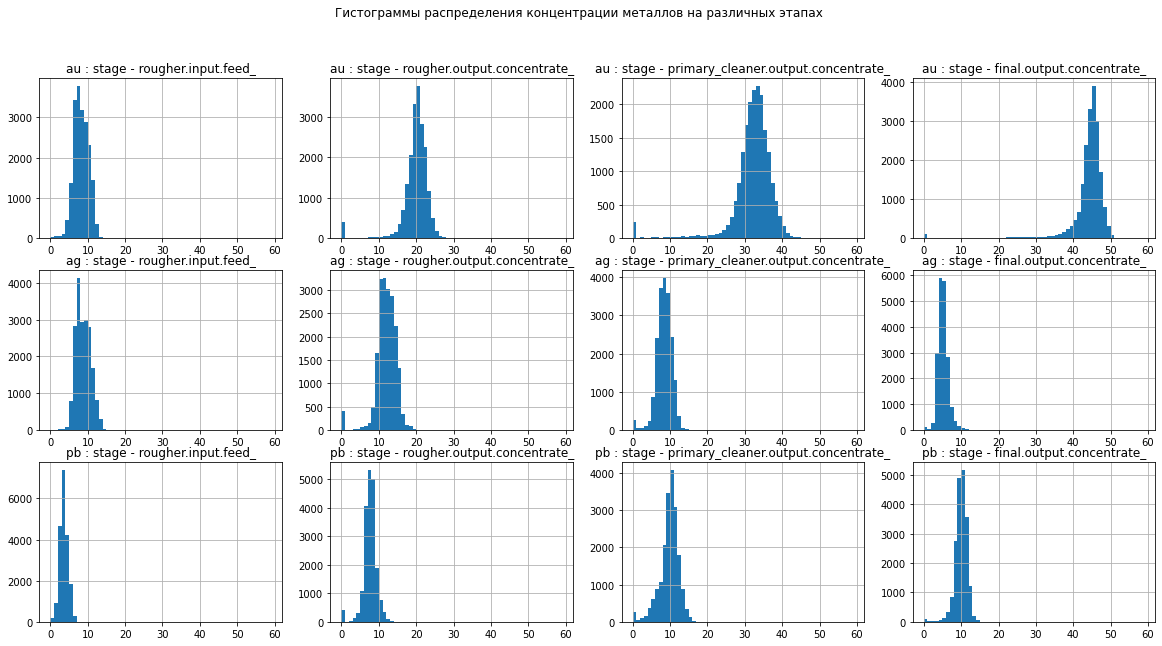

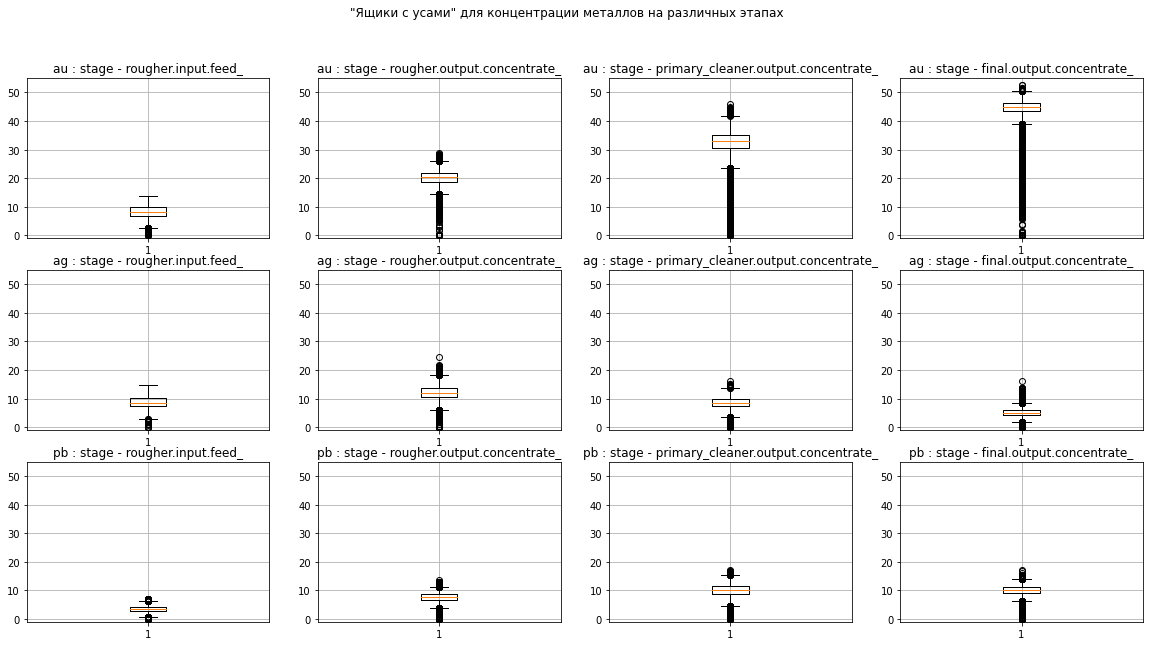

In [12]:
# создаем список интересующих металлов
metals = ['au', 'ag', 'pb']
# создаем список этапов
stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_' ,'final.output.concentrate_']
# задаем параметры гистограмм
fig1, ax1 = plt.subplots(figsize=(20,10), nrows=len(metals), ncols=len(stages))
fig2, ax2 = plt.subplots(figsize=(20,10), nrows=len(metals), ncols=len(stages))
# создаем подписи тайтлов
fig1.suptitle('Гистограммы распределения концентрации металлов на различных этапах')
fig2.suptitle('"Ящики с усами" для концентрации металлов на различных этапах')
# создаем цикл вывода гистограмм и боксплотов
for metal_index, metal in enumerate(metals):
    for stage_index, stage in enumerate(stages):
            column = (f'{stage}{metal}')
            ax1[metal_index][stage_index].hist(data_full[column], bins = list(range(0, 60, 1)))
            ax1[metal_index][stage_index].set_title(f'{metal} : stage - {stage}')
            ax1[metal_index][stage_index].grid()

            ax2[metal_index][stage_index].set_ylim(bottom=-1, top=55)
            ax2[metal_index][stage_index].boxplot(data_full[column])
            ax2[metal_index][stage_index].set_title(f'{metal} : stage - {stage}')
            ax2[metal_index][stage_index].grid()

По гистограммам видно, что все распределения концентраций распределены нормально. Что логично, на каждом этапе концентрация золота (au) стремительно растет по мере прохождения смесью стадий флотации и очисток, концентрация серебра (ag) - постепенно падает, а концентрация свинца (pb) немного возрастает после первичной очистки и почти не меняется после вторичной очистки.

Также для всех металлов заметно достаточно большое количество значений в райное 0 после флотации, однако затем их количество снижается после следующих стадий. Возможно, такая низкая концентрация одного вещества компенсируется большей концентрацией другого. Вернемся к анализу данных значений в процессе исследования.

## 2.2. Сравнение распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

При существенных различиях распределения размеров гранул, оценка модели будет неправильной.

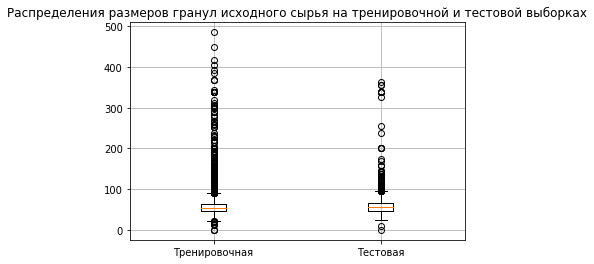

In [13]:
# построим боксплот тестовой и обучающей выборок
plt.boxplot([data_train['rougher.input.feed_size'], data_test['rougher.input.feed_size']], labels=['Тренировочная', 'Тестовая'])
plt.title('Распределения размеров гранул исходного сырья на тренировочной и тестовой выборках')
plt.grid()

В обеих выборках много выбросов по размерам гранул исходного сырья. При этом медианы находятся примерно на одном уровне (~ 60). Можно ожидать, что этот признак не будет приводить к большим ошибкам модели.

## 2.3. Исследование суммарной концентрации металлов на разных стадиях: в сырье, в черновом и в финальном концентрате.

In [14]:
# создаем список интересующих металлов
def total_concentration_on_stage(row, stage_name):
    columns = [f'{stage_name}{metal}' for metal in ['au', 'ag', 'pb', 'sol']]
    res = sum([row[column] for column in columns])
    return res
# создаем цикл этапов
def total_concentration(df):
    stages = ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_' ,'final.output.concentrate_']
    stages_names = ['в сырье', 'в черновом концентрате', 'концентрате после первой очистки', 'в финальном концентрате']
# задаем параметры гистограмм
    fig1, ax1 = plt.subplots(figsize=(10,14), nrows=len(stages), ncols=1)
    fig2, ax2 = plt.subplots(figsize=(10,14), nrows=len(stages), ncols=1)
# создаем подписи тайтлов
    fig1.suptitle('Гистограммы распределения суммарной концентрации веществ на различных этапах')
    fig2.suptitle('"Ящики с усами" для суммарной концентрации веществ на различных этапах')
# создаем цикл вывода гистограмм и боксплотов
    for stage_index, stage in enumerate(stages):
        values = df.apply(lambda row: total_concentration_on_stage(row, stage), axis=1)        
        ax1[stage_index].hist(values, bins = list(range(-10, 110, 1)))
        ax1[stage_index].set_title(f'Суммарная концентрация {stages_names[stage_index]}')
        ax1[stage_index].grid()

        ax2[stage_index].set_ylim(bottom=-10, top=110)
        ax2[stage_index].boxplot(values)
        ax2[stage_index].set_title(f'Суммарная концентрация {stages_names[stage_index]}')
        ax2[stage_index].grid()

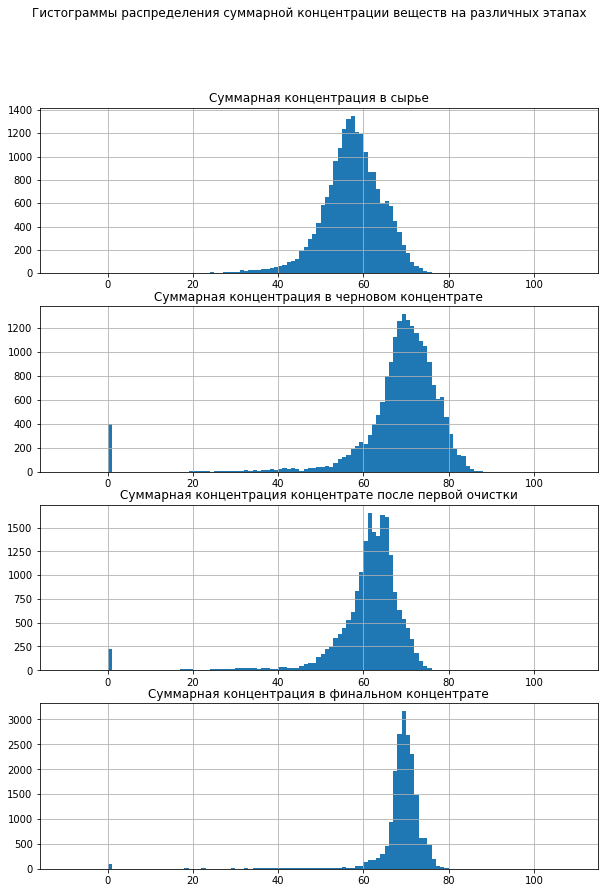

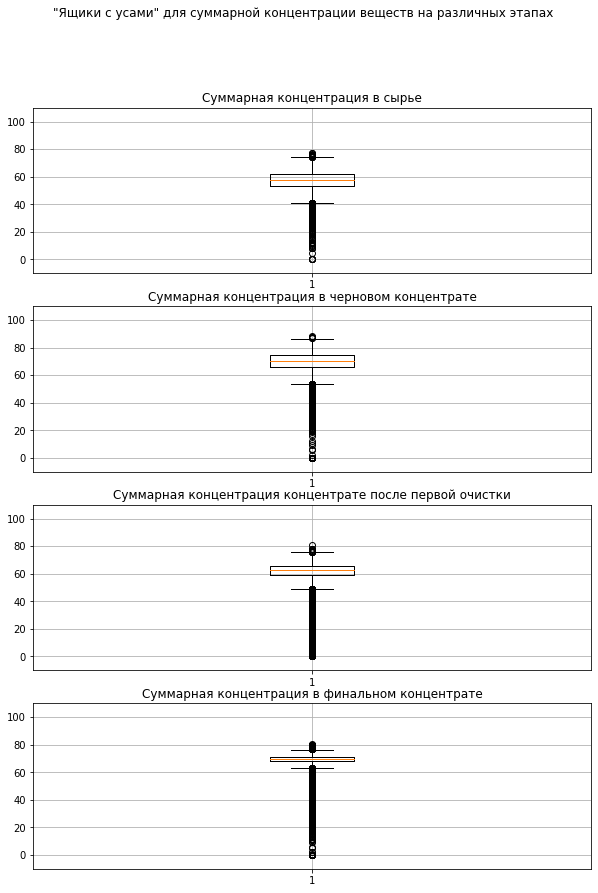

In [15]:
total_concentration(data_full)

Среднее и медианое значения суммарной концентрации для каждого этапа не сильно отличаются, а значит в этих данных мало выбросов. По мере прохождения этапов суммарная концентрация металлов скучивается (концентрируется).

Вновь видим выбросы в райне 0, хоть их количество и уменьшается от этапа к этапу. Вероятно, это ошибки измерений, поэтому избавимся от данных записей, где концентрция одного из веществ на одной из стадий близка к 0 в тренировочной выборке, так как они негативно скажутся на алгоритмах моделей. Исходную выборку трогать не будем, тк на ней формируется тестовая.

In [16]:
print(f'Размер выборки до удаления описанных записей: {data_train.shape}')

metals = ['au', 'ag', 'pb', 'sol']
stages = ['rougher', 'primary_cleaner', 'final']
limit = 0.1

for stage in stages:
    for metal in metals:
        column = f'{stage}.output.concentrate_{metal}'
        data_train = data_train[data_train[column] > limit]
                
print(f'Размеры выборки после удаления описанных записей: {data_train.shape}')

Размер выборки до удаления описанных записей: (14579, 87)
Размеры выборки после удаления описанных записей: (13872, 87)


# 3. Построение модели.<a class="anchor" id="b4"></a>

## 3.1. Написание функции для вычисления итоговой sMAPE.

$$ \text{sMAPE}=\frac{100\%}{N}\sum_{i=1}^{N}\frac{\left|y_{i}-\hat{y_{i}}\right|}{(|y_{i}|+|\hat{y_{i}}|)/2}. $$

Необходимо спрогнозировать сразу две величины:
1. эффективность обогащения чернового концентрата rougher.output.recovery;
2. эффективность обогащения финального концентрата final.output.recovery.

Итоговая метрика складывается из двух величин:

$$ \text{final_sMAPE}= 25\% * \text{sMAPE(rougher)} + 75\% * \text{sMAPE(final)}$$

In [17]:
def smape(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    
    return (abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)).sum(axis=0) * 100 / len(y_true)

smape_scorer = make_scorer(smape)

def final_smape(y_rougher_true, y_rougher_pred, y_final_true, y_final_pred):
    return 0.25 * smape(y_rougher_true, y_rougher_pred) + 0.75 * smape(y_final_true, y_final_pred)

## 3.2. Подготовка признаков.

Выделим целевые признаки из тренировочной выборки, так же возьмем целевые признаки для тестовой выборки из таблицы с исходными данными. Удалим из признаков всех выборок целевые и те, что рассчитываются вместе с целевыми.

In [18]:
# выделяем целевые признаки для тренировочной выборки используя ранее созданную переменную 'target_column'
train_targets = [data_train[target_column] for target_column in target_columns]
data_test = data_test.merge(data_full[['date'] + target_columns] , on='date', how='inner')
# выделяем целевые признаки для тестовой выборки используя ранее созданную переменную 'target_column'
test_targets = [data_test[target_column] for target_column in target_columns]

data_train = data_train.drop(missing_columns + target_columns, axis=1, errors='ignore')
data_test = data_test.drop(missing_columns + target_columns, axis=1, errors='ignore')

In [19]:
# выведем размерности получившихся признаков
print('Размерность тренировочных: признаков:', data_train.shape, 'целевых признаков:', f'({len(train_targets[0])}, {len(train_targets)})')
print('Размерность тестовых: признаков:', data_test.shape, 'целевых признаков:', f'({len(test_targets[0])}, {len(test_targets)})')

Размерность тренировочных: признаков: (13872, 53) целевых признаков: (13872, 2)
Размерность тестовых: признаков: (4860, 53) целевых признаков: (4860, 2)


In [20]:
all_feature_columns = data_train.columns
print('Все признаки:')
print(all_feature_columns)

Все признаки:
Index(['date', 'rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_sol',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate'

Выделим признаки, которые пригодятся для предсказывания каждого целевого признака. 

Для предсказания эффективности обогащения чернового концентрата rougher.output.recovery следует использовать только те признаки, которые известны до этапа rougher.output, то есть все параметры исходной смеси, которая поступает на стадию флотации (`rougher.input.\*`), а также параметры, характеризующие текущее состояние этапа флотации (`rougher.state.\*`).

Для предсказания эффективности обогащения финального концентрата final.output.recovery следует использовать только те признаки, которые известны до этапа final.output , то есть все параметры для предсказания первого этапа, а также входные параметры и состояния этапов отчистки  (`primary_cleaner.input.\*` и `secondary_cleaner.input.\*`; `primary_cleaner.state.\*` и `secondary_cleaner.state.\*`). 


Также для второй модели в качестве признака можно было бы использовать предсказания первой модели. Если первая модель будет высокого каачества, то ее предсказания могут поднять качество второй модели за счет дополнительной информации, однако если первая модель будет сильно ошибаться, то некорректные предсказания испортят и вторую модель. Поэтому лучше передавать второй модели все признаки, которые были доступны первой, чтобы она их оценивала и учитывала самостоятельно.

In [21]:
features_columns = [[], []]
features_columns[0] = [column for column in all_feature_columns 
                       if 'rougher.input.' in column or 'rougher.state.' in column]
features_columns[1] = features_columns[0] + [column for column in all_feature_columns 
                                             if 'primary_cleaner.input.' in column or 'secondary_cleaner.input.' in column
                                             or 'primary_cleaner.state.' in column or 'secondary_cleaner.state.' in column]
print('Признаки для первой модели:', features_columns[0])
Separating_line()
print('Признаки для второй модели:', features_columns[1])

train_features = [data_train[feature_columns] for feature_columns in features_columns]
test_features = [data_test[feature_columns] for feature_columns in features_columns]

Признаки для первой модели: ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate']
--------------------------------------------------------------------------------
Признаки для второй модели: ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_rat

In [22]:
# Код ревьюера
features_train_r = data_train.filter(regex='rougher', axis=1)
features_train_f = data_train.filter(regex='secondary|primary', axis=1)
features_train_r.info(), features_train_f.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13872 entries, 0 to 14578
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_au               13872 non-null  float64
 1   rougher.input.feed_ag               13872 non-null  float64
 2   rougher.input.feed_pb               13872 non-null  float64
 3   rougher.input.feed_sol              13872 non-null  float64
 4   rougher.input.feed_rate             13872 non-null  float64
 5   rougher.input.feed_size             13872 non-null  float64
 6   rougher.input.floatbank10_sulfate   13872 non-null  float64
 7   rougher.input.floatbank10_xanthate  13872 non-null  float64
 8   rougher.state.floatbank10_a_air     13872 non-null  float64
 9   rougher.state.floatbank10_a_level   13872 non-null  float64
 10  rougher.state.floatbank10_b_air     13872 non-null  float64
 11  rougher.state.floatbank10_b_level   13872

## 3.3. Обучим различные модели с различными гиперпараметрами.

Будем обучать 3 вида моделей (DecisionTreeRegressor, RandomForestRegressor и LinearRegression), варьируя их гиперпараметры  и оценивая качество кросс-валидацией. Выберем лучшие модели для каждого из 2 предсказаний.

Найдем лучшие гиперпараметры для модели 'DecisionTreeRegressor'.

In [23]:
# используем блок случайной перекрестной проверки 
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=STATE)

def find_best_tree_params(train_features, train_target):
    
    print('Подбор лучших гиперпараметров модели DecisionTreeRegressor')
    
    tree_columns = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'smape_score', 'mse_score']
    print(tree_columns)
    
    cmp_tree = []
    for max_depth in range(10, 18, 2):
        for min_samples_split in [0.0001, 0.001]:
            for min_samples_leaf in [0.0001, 0.001]:
                model = DecisionTreeRegressor(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        random_state=STATE)
                smape_score = cross_val_score(model, train_features, train_target, scoring=smape_scorer, cv=cv).mean()
                mse_score = cross_val_score(model, train_features, train_target, scoring='neg_mean_squared_error', cv=cv).mean()

                row = [max_depth, min_samples_split, min_samples_leaf, round(smape_score, 3), round(-mse_score, 3)]
                cmp_tree.append(row)
                print(row)

    cmp_tree = pd.DataFrame(data=cmp_tree, columns=tree_columns).sort_values(by=['smape_score', 'mse_score'])
    return cmp_tree

Найдем лучшие гиперпараметры для модели 'RandomForestRegressor'.

In [24]:
def find_best_forest_params(train_features, train_target):
    
    print('Подбор лучших гиперпараметров модели RandomForestRegressor')
    
    forest_columns = ['n_estimators', 'max_depth',  'smape_score', 'mse_score']
    print(forest_columns)
    
    cmp_forest = []

    for n_estimators in range(20, 31, 5):
        for max_depth in range(5, 15, 3):
            model = RandomForestRegressor(
                max_depth=max_depth,
                n_estimators=n_estimators,
                random_state=STATE)
            smape_score = cross_val_score(model, train_features, train_target, scoring=smape_scorer, cv=cv).mean()
            mse_score = cross_val_score(model, train_features, train_target, scoring='neg_mean_squared_error', cv=cv).mean()

            row = [n_estimators, max_depth, round(smape_score, 3), round(-mse_score, 3)]
            cmp_forest.append(row)
            print(row)

    cmp_forest = pd.DataFrame(data=cmp_forest, columns=forest_columns).sort_values(by=['smape_score', 'mse_score'])
    return cmp_forest

Оценим модель 'LinearRegression'.

In [25]:
def evaluate_regression(train_features, train_target):
    print('Оценка модели LinearRegression')
    model = LinearRegression()
    smape_score = cross_val_score(model, train_features, train_target, scoring=smape_scorer, cv=cv).mean()
    mse_score = cross_val_score(model, train_features, train_target, scoring='neg_mean_squared_error', cv=cv).mean()
    return {'smape_score': round(smape_score, 3), 'mse_score': round(-mse_score, 3)}

### 3.3.1 Предсказание первой величины (эффективность обогащения чернового концентрата rougher.output.recovery)

В целях экономии времени результаты работы модели будут прописаны в маркдаунах, а сами модели закомментированны. При необходимости можно построить.

In [26]:
%%time
best_trees = find_best_tree_params(train_features[0], train_targets[0])
best_tree = best_trees.iloc[0, :]

print('Топ 5 наборов гиперпараметров для DecisionTreeRegressor')
best_trees.head(5)

Подбор лучших гиперпараметров модели DecisionTreeRegressor
['max_depth', 'min_samples_split', 'min_samples_leaf', 'smape_score', 'mse_score']
[10, 0.0001, 0.0001, 3.853, 24.992]
[10, 0.0001, 0.001, 3.786, 24.18]
[10, 0.001, 0.0001, 3.656, 23.446]
[10, 0.001, 0.001, 3.743, 22.158]
[12, 0.0001, 0.0001, 3.762, 22.314]
[12, 0.0001, 0.001, 3.58, 22.056]
[12, 0.001, 0.0001, 3.625, 23.672]
[12, 0.001, 0.001, 3.561, 24.021]
[14, 0.0001, 0.0001, 3.679, 23.864]
[14, 0.0001, 0.001, 3.532, 20.496]
[14, 0.001, 0.0001, 3.628, 22.569]
[14, 0.001, 0.001, 3.58, 22.919]
[16, 0.0001, 0.0001, 3.758, 24.04]
[16, 0.0001, 0.001, 3.573, 21.388]
[16, 0.001, 0.0001, 3.618, 21.775]
[16, 0.001, 0.001, 3.515, 20.209]
Топ 5 наборов гиперпараметров для DecisionTreeRegressor
CPU times: user 35.3 s, sys: 41.6 ms, total: 35.3 s
Wall time: 35.4 s


,max_depth,min_samples_split,min_samples_leaf,smape_score,mse_score
15,16,0.001,0.001,3.515,20.209
9,14,0.000,0.001,3.532,20.496
7,12,0.001,0.001,3.561,24.021
13,16,0.000,0.001,3.573,21.388
5,12,0.000,0.001,3.580,22.056


In [26]:
%%time
best_forests = find_best_forest_params(train_features[0], train_targets[0])
best_forest = best_forests.iloc[0, :]

print('5 лучших наборов гиперпараметров для RandomForestRegressor')
best_forests.head(5)

In [27]:
best_regression = evaluate_regression(train_features[0], train_targets[0])
print('Качество LinearRegression:')
best_regression

Сравнение моделей для первого предсказания

In [28]:
print('Лучшей DecisionTreeRegressor')
print(best_tree)
print()

print('Лучший RandomForestRegressor')
print(best_forest)
print()

print('LinearRegression')
print(best_regression)
print()

Таким образом, для предсказания первого признака (эффективность обогащения чернового концентрата rougher.output.recovery) будем использовать модель с наименьшим smape на кросс-валидации: RandomForestRegressor(n_estimators=25, max_depth=14, random_state=RANDOM) с smape=2.897.

### 3.3.2 Предсказание второй величины (эффективность обогащения финального концентрата final.output.recovery.)

In [29]:
%%time
best_trees2 = find_best_tree_params(train_features[1], train_targets[1])
best_tree2 = best_trees2.iloc[0, :]
print('5 лучших наборов гиперпараметров для DecisionTreeRegressor')
print(best_trees2.head(5))

In [30]:
%%time
best_forests2 = find_best_forest_params(train_features[1], train_targets[1])
best_forest2 = best_forests2.iloc[0, :]
print('5 лучших наборов гиперпараметров для RandomForestRegressor')
print(best_forests2.head(5))

In [31]:
best_regression2 = evaluate_regression(train_features[1], train_targets[1])
print('Качество LinearRegression:')
best_regression2

Сравнение моделей для второго предсказания

In [32]:
print('Лучшей DecisionTreeRegressor')
print(best_tree2)
print()

print('Лучший RandomForestRegressor')
print(best_forest2)
print()

print('LinearRegression')
print(best_regression2)
print()

Таким образом, для предсказания первого признака (эффективность обогащения финального концентрата final.output.recovery) будем использовать модель с наименьшим smape на кросс-валидации: RandomForestRegressor(n_estimators=30, max_depth=14, random_state=RANDOM) с smape=6.014.

### 3.4. Оценим выбранные модели на тестовой выброке по итоговой метрике (final_sMAPE)

Для сравнения рассчитаем, какие sMAPE для каждого предсказания и итоговый получатся на тестовой выборке, если вместо предсказаний модели всегда использовать соответствующие средние значения или медиану по тренировочной выборке.

In [33]:
n = len(test_features[0])

answers_mean = [pd.Series([train_targets[0].mean()] * n), pd.Series([train_targets[1].mean()] * n)]
answers_median = [pd.Series([train_targets[0].median()] * n), pd.Series([train_targets[1].median()] * n)]

smapes_mean = [
    smape(test_targets[0], answers_mean[0]), 
    smape(test_targets[1], answers_mean[1]), 
    final_smape(test_targets[0], answers_mean[0], test_targets[1], answers_mean[1])
]
smapes_median = [
    smape(test_targets[0], answers_median[0]), 
    smape(test_targets[1], answers_median[1]), 
    final_smape(test_targets[0], answers_median[0], test_targets[1], answers_median[1])
]

Теперь создадим и обучим на тренировочной выборке выбранные для обоих предсказаний модели, а затем вычислим их sMAPE для каждого предсказания и итоговый на тестовой выборке

In [34]:
models = [
    
    RandomForestRegressor(n_estimators=25, max_depth=14, random_state=STATE).fit(train_features[0], train_targets[0]), 
    RandomForestRegressor(n_estimators=30, max_depth=14, random_state=STATE).fit(train_features[1], train_targets[1]), 
]

answers_model = [models[0].predict(test_features[0]), models[1].predict(test_features[1])]
smapes_model = [
    smape(test_targets[0], answers_model[0]), 
    smape(test_targets[1], answers_model[1]), 
    final_smape(test_targets[0], answers_model[0], test_targets[1], answers_model[1])
]

In [35]:
r = 3
print('Результаты (sMAPE)')
print(f"Средними:  1) {round(smapes_mean[0], r)} 2) {round(smapes_mean[1], r)} final) {round(smapes_mean[2], r)}")
print(f"Медианами: 1) {round(smapes_median[0], r)} 2) {round(smapes_median[1], r)} final) {round(smapes_median[2], r)}")
print(f"Моделью:   1) {round(smapes_model[0], r)} 2) {round(smapes_model[1], r)} final) {round(smapes_model[2], r)}")

**Результаты (sMAPE) после корректировки исследования.** \
Средними:  1) 6.101 2) 9.256 final) 8.467\
Медианами: 1) 5.835 2) 9.115 final) 8.295\
Моделью:   1) 2.995 2) 6.448 final) 5.584

# 4. Выводы.<a class="anchor" id="b5"></a>

В ходе работы было выполнено:

1) Подготовлены данные.
2) Проведен исследовательский анализ данных.
3) Построена и обучена модель.

Работа над проектом велась в течении нескольких дней. Основная сложность - скорость прохождения кросс-валидации с поиском лучших гиперпараметров.

Итог:\
Обученные модели превзошли константные (медианную и среднюю) по итоговой метрике, которая складывается из smape двух предсказаний, в 1.5 - 2 раза. 

Лучшая модель проверена на тестовой выборке. ‘Итоговое_sMAPE’ = 5.585.\
Для золотодобывающего горно-обогатительного комбината можно рекомендовать модель 'Cлучайного леса', она вероятнее всего обеспечит положительную работу с подобным набором данных.